In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time;  from datetime import datetime
import math
plt.rcParams["figure.figsize"] = (15,10)

In [280]:
desklet = pd.read_csv('desklet_bid_adjustments.csv') # read the desklet
orig_desklet=desklet

In [281]:
desklet.rename(columns={'Avg. CPC':'avg_cpc'}, inplace=True)
desklet.rename(columns={'Cost / conv.':'cost_per_conv'}, inplace=True)
desklet.rename(columns={'Conv. rate':'conversion_rate'}, inplace=True)
desklet.rename(columns={'Avg. CPC':'avg_cpc'}, inplace=True)


In [307]:
orig_desklet.head()

,Location,Bid adj.,Clicks,Impr.,CTR,avg_cpc,Cost,Avg. pos.,Conversions,cost_per_conv,conversion_rate,Conv. value,Conv. value / cost,state
0,"Milwaukee, Wisconsin, United States",60.0,482,"9,312",5.18,0.67,324.67,2.5,21.0,15.46,4.36,1900.95,5.86,Wisconsin
1,"Plant City, Florida, United States",30.0,57,632,9.02,0.69,39.38,2.7,5.0,7.88,8.77,491.92,12.49,Florida
2,"North Carolina, United States",0.0,"6,205","102,295",6.07,0.50,3076.82,2.8,131.0,23.49,2.11,11291.79,3.67,North Carolina
3,"92128, California, United States",200.0,62,"1,000",6.20,0.15,71.39,1.8,1.0,71.39,1.61,109.16,1.53,California
4,"38103, Tennessee, United States",50.0,4,145,2.76,0.15,0.61,3.3,0.0,0.00,0.00,0.00,0.00,Tennessee


In [319]:
desklet[desklet.state.isnull()]

,Location,Bid adj.,Clicks,Impr.,CTR,avg_cpc,Cost,Avg. pos.,Conversions,cost_per_conv,conversion_rate,Conv. value,Conv. value / cost,state,cityzip
63,United States,0.0,511,"16,031",3.19,0.42,215.42,2.6,5.0,43.08,0.98,352.65,1.64,NaN,NaN
327,Total: Locations,0.0,"230,412","3,955,071",5.83,0.54,125024.87,2.7,5186.0,24.08,2.25,517228.20,4.14,NaN,NaN
328,Total: Account,0.0,"234,047","4,011,584",5.83,0.54,127534.96,2.7,5273.0,24.16,2.26,525133.64,4.12,NaN,NaN


In [ ]:
# TODO

# DROP LAST 2 ROWS FROM DESKLET

In [285]:
def convert_dollar_float(row):
    try:
        return float(str(row)[1:])
    except:
        return float(str(row)[1:].replace(',', ''))
    
desklet.Cost = desklet.Cost.apply(convert_dollar_float)
desklet.avg_cpc = desklet.avg_cpc.apply(convert_dollar_float)
desklet.cost_per_conv = desklet.cost_per_conv.apply(convert_dollar_float)
desklet.avg_cpc = desklet.avg_cpc.apply(convert_dollar_float)

In [286]:
def convert_percentage_float(row):
    return float(str(row)[:-1])
    
    
desklet.conversion_rate = desklet.conversion_rate.apply(convert_percentage_float)    
desklet.CTR = desklet.CTR.apply(convert_percentage_float)    

In [287]:
def change_comma_values_to_float(row):
    row = str(row).replace(',', '')
    return float(row)
    
desklet.Conversions=desklet.Conversions.apply(change_comma_values_to_float)
desklet['Conv. value']=desklet['Conv. value'].apply(change_comma_values_to_float)

In [288]:
def strip_first_last(row):
    try:
        row  = (str(row)[1:-1])
        return float(row)
    except:
        return 0
# strip_first_last('+60%')
desklet['Bid adj.']=desklet['Bid adj.'].apply(strip_first_last)


In [304]:
def state_from_location(row):
    try:
        row = str(row).split(',')
        return row[-2].strip()
    except:
        return np.nan
desklet['state'] = desklet.Location.apply(state_from_location)

In [312]:
a = '33142, Florida, United States'

def cityzip_from_location(row):
    try:
        row = str(row).split(',')
        return row[-3].strip()
    except:
        return np.nan
desklet['cityzip'] = desklet.Location.apply(cityzip_from_location)


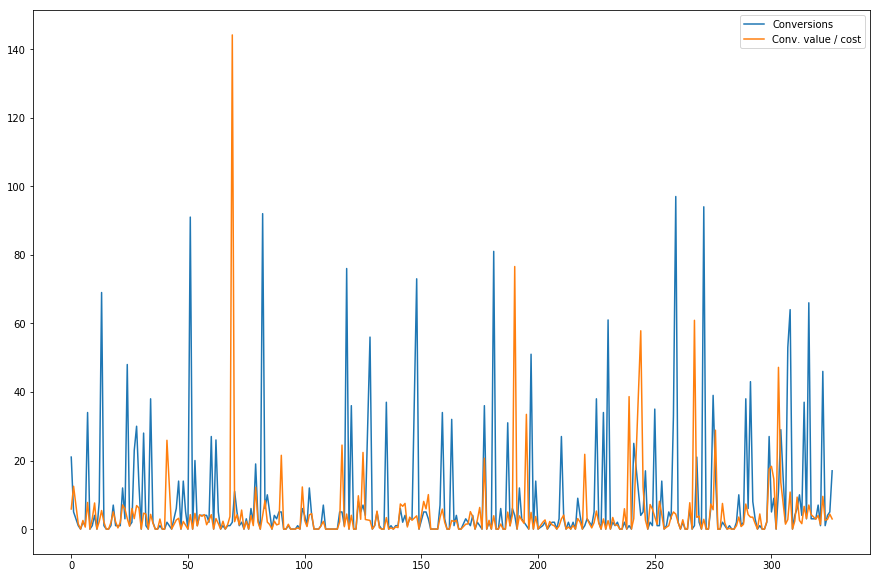

In [207]:
df2 = desklet[desklet['Conversions']<100]
df2[["Conversions","Conv. value / cost"]].plot()

### TODO 

Convert all the numbers in the table to numbers!

In [148]:
# Sort this by column1
desklet["Conv. value / cost"].value_counts().head()

0.00    96
0.94     4
3.07     3
0.35     3
4.39     3
Name: Conv. value / cost, dtype: int64

In [152]:
# There are a number of records where no conversions happen, and some of them cost a lot of money
# We could turn down the BA on these.
# Is there anything we need to check against for this? 
# The conversion rate here is 0
# Total cost for these ads - once the cost is an int.

cost_where_no_conversion= 0


In [43]:
desklet["Conv. value / cost"].describe().iloc[1]

4.4473556231003037

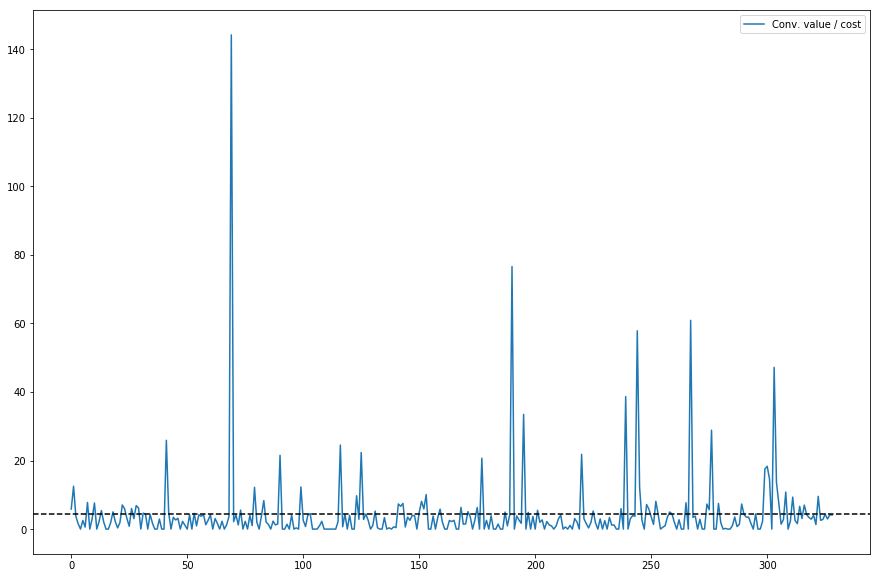

In [137]:
# This is the average revenue in $ per dollar spent on advertising.
# We should try to even out this graph, with ideally everything ~= 1 (thats for marginal though. Hmmmm)
# So press down the bumps with increases in spending, and pull up the troughs by reducing spending.

desklet[["Conv. value / cost"]].plot().\
axhline(y=desklet["Conv. value / cost"].describe().iloc[1], color='black', linestyle='--')